# Import Library

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sqlite3
import folium
from folium import plugins
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
df = pd.read_csv("rumah_bandung_cleaned.csv")
df

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176
...,...,...,...,...,...,...,...,...
7604,"Rumah Lux Terawat di Taman Sakura Raya , Bandung","Babakanciparay, Bandung",4,5,0,11000000000,600,500
7605,Rumah 3 Lantai Bagus Terawat di Sumber Sari,"Babakanciparay, Bandung",4,5,2,3200000000,200,600
7606,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,5500000000,375,290
7607,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,4890000000,375,290


In [ ]:
df.drop(columns=["house_name", "location"], inplace=True)
df.drop(df.columns[0], axis=1)
df

,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
0,3,2,2,2100000000,137,170
1,3,2,3,4100000000,202,300
2,5,2,1,3300000000,350,258
3,2,2,1,580000000,30,80
4,11,3,0,1300000000,176,176
...,...,...,...,...,...,...
7604,4,5,0,11000000000,600,500
7605,4,5,2,3200000000,200,600
7606,6,3,3,5500000000,375,290
7607,5,3,3,4890000000,375,290


In [ ]:
df.rename(columns={"bedroom_count": "JKT", "bathroom_count": "JKM", "carport_count": "GRS", "land_area": "LT", "building_area (m2)": "LB"}, inplace=True)
df

,JKT,JKM,GRS,price,LT,LB
0,3,2,2,2100000000,137,170
1,3,2,3,4100000000,202,300
2,5,2,1,3300000000,350,258
3,2,2,1,580000000,30,80
4,11,3,0,1300000000,176,176
...,...,...,...,...,...,...
7604,4,5,0,11000000000,600,500
7605,4,5,2,3200000000,200,600
7606,6,3,3,5500000000,375,290
7607,5,3,3,4890000000,375,290


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   JKT     7609 non-null   int64
 1   JKM     7609 non-null   int64
 2   GRS     7609 non-null   int64
 3   price   7609 non-null   int64
 4   LT      7609 non-null   int64
 5   LB      7609 non-null   int64
dtypes: int64(6)
memory usage: 356.8 KB


In [ ]:
df.shape

(7609, 6)

# Data Preprocessing and Cleaning

In [ ]:
duplicate_row = df[df.duplicated()]
len(duplicate_row)

1513

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
missing_value = df.isnull()

for col in missing_value.columns.values.tolist():
    print(missing_value[col].value_counts())
    print('')

JKT
False    6096
Name: count, dtype: int64

JKM
False    6096
Name: count, dtype: int64

GRS
False    6096
Name: count, dtype: int64

price
False    6096
Name: count, dtype: int64

LT
False    6096
Name: count, dtype: int64

LB
False    6096
Name: count, dtype: int64



In [ ]:
df = df[(df["JKM"] != 0) & (df["JKT"] != 0)]

In [ ]:
df = df[(df["LB"] != 0) & (df["LT"] != 0)]

In [ ]:
df_nonsense = df.sort_values("LB", ascending=False)
df_nonsense.head()

,JKT,JKM,GRS,price,LT,LB
7344,5,4,1,3600000000,180,3006000
6986,4,3,0,8750000000,282,7000
1844,11,3,2,9000000000,390,6265
2774,5,5,0,120000000000,10700,6000
6446,99,99,0,45000000000,2454,4000


In [ ]:
df = df.drop(7344)

In [ ]:
df_expensive = df.sort_values("price", ascending=False)
df_expensive.head()

,JKT,JKM,GRS,price,LT,LB
1534,2,2,1,735000000000,66,56
3568,3,2,1,720000000000,81,120
4465,8,5,0,225000000000,5468,510
4473,8,5,2,225000000000,5468,510
4467,10,5,0,126000000000,2822,500


In [ ]:
df = df.drop([1534, 3568])

In [ ]:
list = ["JKT", "JKM", "LB", "LT"]
index_outlier = []

for i in list:
    quartile_1 = df[i].quantile(0.25)
    quartile_3 = df[i].quantile(0.75)
    IQR = quartile_3 - quartile_1
    print("For column",i)
    print("The value of Inter Quartile Range is", IQR)
    up_bound = quartile_3 + IQR*1.5
    print("Upper bound is", up_bound)
    print(" ")
    index_outlier.extend(df[df[i] > up_bound].index.tolist())

df_clean = df.drop(index_outlier)

For column JKT
The value of Inter Quartile Range is 2.0
Upper bound is 8.0
 
For column JKM
The value of Inter Quartile Range is 2.0
Upper bound is 7.0
 
For column LB
The value of Inter Quartile Range is 198.0
Upper bound is 597.0
 
For column LT
The value of Inter Quartile Range is 216.0
Upper bound is 645.0
 


In [ ]:
df_clean

,JKT,JKM,GRS,price,LT,LB
0,3,2,2,2100000000,137,170
1,3,2,3,4100000000,202,300
2,5,2,1,3300000000,350,258
3,2,2,1,580000000,30,80
5,5,3,1,3600000000,184,234
...,...,...,...,...,...,...
7602,3,2,1,800000000,128,111
7603,3,2,0,780000000,110,90
7606,6,3,3,5500000000,375,290
7607,5,3,3,4890000000,375,290


In [ ]:
df_clean.rename(columns={"price": "HARGA"}, inplace=True)
df_clean

,JKT,JKM,GRS,HARGA,LT,LB
0,3,2,2,2100000000,137,170
1,3,2,3,4100000000,202,300
2,5,2,1,3300000000,350,258
3,2,2,1,580000000,30,80
5,5,3,1,3600000000,184,234
...,...,...,...,...,...,...
7602,3,2,1,800000000,128,111
7603,3,2,0,780000000,110,90
7606,6,3,3,5500000000,375,290
7607,5,3,3,4890000000,375,290


In [ ]:
df_clean["HARGA"]=df_clean["HARGA"]/1000000000
df_clean.to_csv("rumah_bandung_clean.csv")
df_clean

,JKT,JKM,GRS,HARGA,LT,LB
0,3,2,2,2.10,137,170
1,3,2,3,4.10,202,300
2,5,2,1,3.30,350,258
3,2,2,1,0.58,30,80
5,5,3,1,3.60,184,234
...,...,...,...,...,...,...
7602,3,2,1,0.80,128,111
7603,3,2,0,0.78,110,90
7606,6,3,3,5.50,375,290
7607,5,3,3,4.89,375,290


In [48]:
df_clean = pd.read_csv("rumah_bandung_clean.csv")

In [73]:
count_bedroom = df_clean[["JKT"]].value_counts()
type_bedroom_house = [type[0] for type in count_bedroom.keys()]
print('opsi jumlah kamar tidur: ', type_bedroom_house)

opsi jumlah kamar tidur:  [3, 4, 2, 5, 6, 7, 1, 8]


In [76]:
count_bathroom = df_clean[["JKM"]].value_counts()
type_bathroom_house = [type[0] for type in count_bathroom.keys()]
print('opsi jumlah kamar mandi: ', type_bathroom_house)

opsi jumlah kamar mandi:  [2, 3, 1, 4, 5, 6, 7]


In [77]:
count_garage = df_clean[["GRS"]].value_counts()
type_garage_house = [type[0] for type in count_garage.keys()]
print('opsi jumlah mobil di garasi: ', type_garage_house)

opsi jumlah mobil di garasi:  [1, 0, 2, 3, 4, 5, 6, 8, 10, 7, 13, 15]


In [49]:
df_selected = df_clean.astype(np.int64)
df_selected["HARGA"] = df_clean["HARGA"].astype(np.float64)
df_selected

,Unnamed: 0,JKT,JKM,GRS,HARGA,LT,LB
0,0,3,2,2,2.10,137,170
1,1,3,2,3,4.10,202,300
2,2,5,2,1,3.30,350,258
3,3,2,2,1,0.58,30,80
4,5,5,3,1,3.60,184,234
...,...,...,...,...,...,...,...
4974,7602,3,2,1,0.80,128,111
4975,7603,3,2,0,0.78,110,90
4976,7606,6,3,3,5.50,375,290
4977,7607,5,3,3,4.89,375,290


# Cleaning Data from Outliers

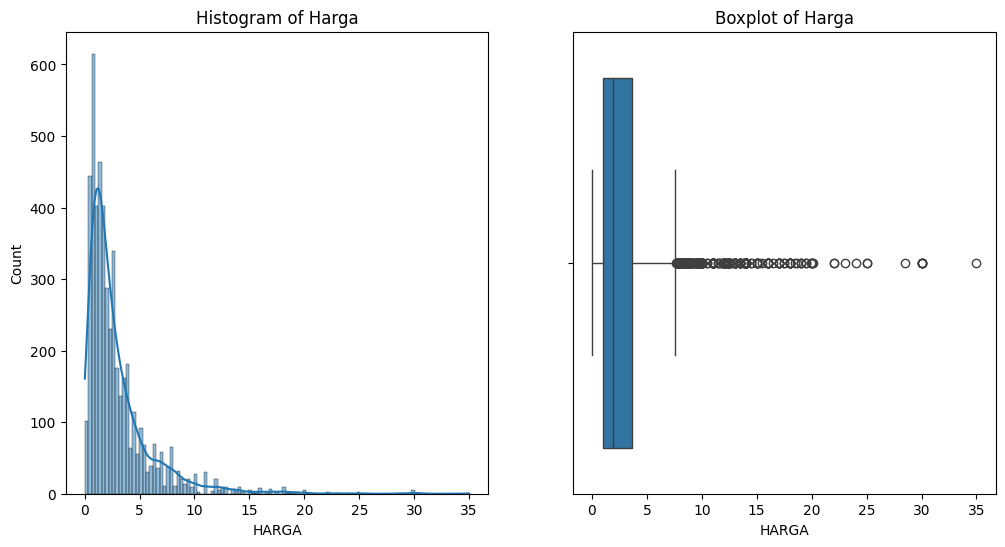

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_selected["HARGA"], kde=True)
plt.title('Histogram of Harga')

# Plot boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_selected["HARGA"])
plt.title('Boxplot of Harga')

plt.show()

In [51]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_selected["HARGA"].quantile(0.25)
Q3 = df_selected["HARGA"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df_selected[(df_selected["HARGA"] >= lower_bound) & (df_selected["HARGA"] <= upper_bound)]

print(f'Original data size: {df_selected.shape[0]}')
print(f'Cleaned data size: {df_cleaned.shape[0]}')

Original data size: 4979
Cleaned data size: 4610


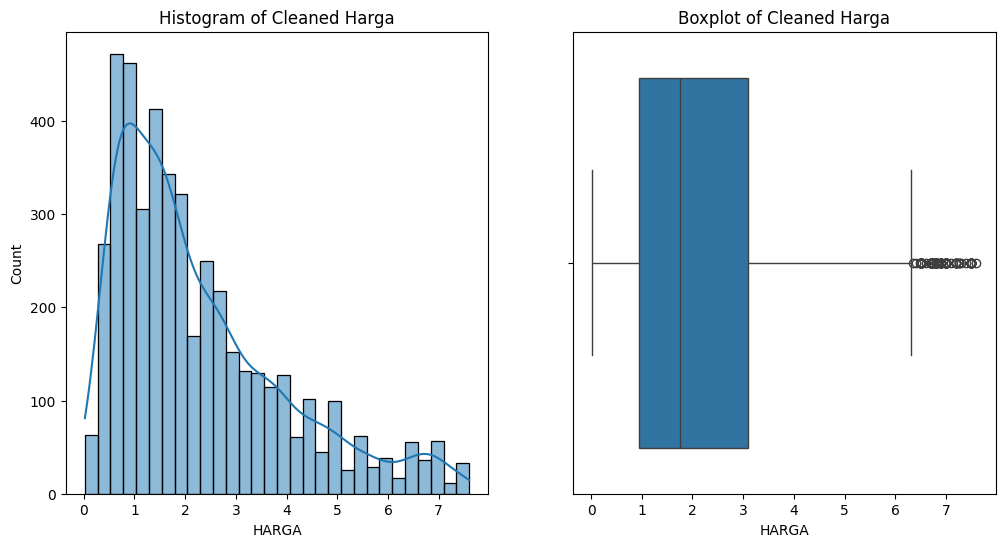

In [52]:
# Plot histogram of cleaned data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['HARGA'], kde=True)
plt.title('Histogram of Cleaned Harga')

# Plot boxplot of cleaned data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['HARGA'])
plt.title('Boxplot of Cleaned Harga')

plt.show()

# Classifying Data to 3 Categories

In [53]:
def classify_price(harga:float|int,price_column):

    print('minimum price : ', harga[price_column].min())
    print('maximum price : ', harga[price_column].max())
    print('------------------------------------')
    print('murah         : harga <= 1.000.000.000 ')
    print('sedang        : 1.000.000.000 < harga <= 3.000.000')
    print('mahal         : harga > 3.000.000.000')


    # Function to classify each price
    def classify(price):
        if price <= 1:
            return 'Murah'
        elif price <= 3:
            return 'Sedang'
        else:
            return 'Mahal'

    # Apply classification
    harga['Category'] = harga[price_column].apply(classify)

    return harga

classified_df = classify_price(df_cleaned, 'HARGA')

classified_df.drop('HARGA', axis=1, inplace=True)

classified_df.to_csv(r'data_rumah_category2.csv', index = False, header = True)

df_cleaned["Category"] = classified_df["Category"]

minimum price :  0.022
maximum price :  7.6
------------------------------------
murah         : harga <= 1.000.000.000 
sedang        : 1.000.000.000 < harga <= 3.000.000
mahal         : harga > 3.000.000.000


In [54]:
df_cleaned

,Unnamed: 0,JKT,JKM,GRS,LT,LB,Category
0,0,3,2,2,137,170,Sedang
1,1,3,2,3,202,300,Mahal
2,2,5,2,1,350,258,Mahal
3,3,2,2,1,30,80,Murah
4,5,5,3,1,184,234,Mahal
...,...,...,...,...,...,...,...
4974,7602,3,2,1,128,111,Murah
4975,7603,3,2,0,110,90,Murah
4976,7606,6,3,3,375,290,Mahal
4977,7607,5,3,3,375,290,Mahal


In [55]:
category_distribution = df_cleaned['Category'].value_counts()
print("\Category Distribution Count:")
print(category_distribution)

\Category Distribution Count:
Category
Sedang    2168
Murah     1262
Mahal     1180
Name: count, dtype: int64


In [57]:
category_mapping = {'Murah': 0, 'Sedang': 1, 'Mahal': 2}
df_encoder = df_cleaned.replace({"Category": category_mapping})
print(df_encoder)

      Unnamed: 0  JKT  JKM  GRS   LT   LB  Category
0              0    3    2    2  137  170         1
1              1    3    2    3  202  300         2
2              2    5    2    1  350  258         2
3              3    2    2    1   30   80         0
4              5    5    3    1  184  234         2
...          ...  ...  ...  ...  ...  ...       ...
4974        7602    3    2    1  128  111         0
4975        7603    3    2    0  110   90         0
4976        7606    6    3    3  375  290         2
4977        7607    5    3    3  375  290         2
4978        7608    4    2    0  200  180         1

[4610 rows x 7 columns]


# Handling Imbalanced Dataset Using Random Oversampling

In [58]:
X = df_encoder.drop("Category",axis=1)
y = df_encoder["Category"].values

In [59]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

features = ['JKT', 'JKM', 'GRS', 'LT', 'LB']

# Combine resampled features and labels into a new DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=features)
df_resampled['Category'] = y_resampled

In [60]:
category_distribution = df_resampled['Category'].value_counts()
print("\Category Distribution Count:")
print(category_distribution)

\Category Distribution Count:
Category
1    2168
2    2168
0    2168
Name: count, dtype: int64


In [89]:
df_resampled.to_csv(r'data_rumah_category3.csv', index = False, header = True)

In [87]:
category_mapping2 = {0:'Murah', 1:'Sedang', 2:'Mahal'}
df_resampled2 = df_resampled.replace({"Category": category_mapping2})

In [88]:
df_resampled2.to_csv(r'data_rumah_category4.csv', index = False, header = True)

# Splitting Training and Testing Data (0.2 Ratio)

In [106]:
X = df_resampled.drop("Category",axis=1)
y = df_resampled["Category"].values

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,JKT,JKM,GRS,LT,LB
0,3,2,2,137,170
1,3,2,3,202,300
2,5,2,1,350,258
3,2,2,1,30,80
4,5,3,1,184,234
...,...,...,...,...,...
6499,4,3,1,200,275
6500,6,2,2,428,350
6501,3,3,0,349,370
6502,4,3,1,200,130


# Training Various Models

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results_test = {}
results_train = {}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred_test = model.predict(X_test)

    # Making predictions on the training set
    y_pred_train = model.predict(X_train)

    # Evaluating the model on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    # Evaluating the model on the training set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    # Storing the results
    results_test[name] = {
        'Accuracy Test': accuracy_test,
        'Precision Test': precision_test,
        'Recall Test': recall_test,
        'F1 Score Test': f1_test
    }
    results_train[name] = {
        'Accuracy Train': accuracy_train,
        'Precision Train': precision_train,
        'Recall Train': recall_train,
        'F1 Score Train': f1_train
    }

# Convert the results to DataFrame for better visualization
results_test_df = pd.DataFrame.from_dict(results_test, orient='index')
results_train_df = pd.DataFrame.from_dict(results_train, orient='index')

print("Test Results:")
print(results_test_df)
print("\nTrain Results:")
print(results_train_df)

Test Results:
                        Accuracy Test  Precision Test  Recall Test  \
Logistic Regression          0.750192        0.751484     0.750192   
Decision Tree                0.839354        0.837532     0.839354   
Random Forest                0.872406        0.871126     0.872406   
Support Vector Machine       0.764028        0.760861     0.764028   
Gradient Boosting            0.803228        0.801339     0.803228   

                        F1 Score Test  
Logistic Regression          0.750408  
Decision Tree                0.838035  
Random Forest                0.870736  
Support Vector Machine       0.761722  
Gradient Boosting            0.801879  

Train Results:
                        Accuracy Train  Precision Train  Recall Train  \
Logistic Regression           0.753796         0.752595      0.753796   
Decision Tree                 0.988853         0.988936      0.988853   
Random Forest                 0.988853         0.988890      0.988853   
Support Vector Ma

# Model Evaluation

In [112]:
print("Test Results:")
display(results_test_df)

print("\nTrain Results:")
display(results_train_df)

Test Results:


,Accuracy Test,Precision Test,Recall Test,F1 Score Test
Logistic Regression,0.750192,0.751484,0.750192,0.750408
Decision Tree,0.839354,0.837532,0.839354,0.838035
Random Forest,0.872406,0.871126,0.872406,0.870736
Support Vector Machine,0.764028,0.760861,0.764028,0.761722
Gradient Boosting,0.803228,0.801339,0.803228,0.801879



Train Results:


,Accuracy Train,Precision Train,Recall Train,F1 Score Train
Logistic Regression,0.753796,0.752595,0.753796,0.752883
Decision Tree,0.988853,0.988936,0.988853,0.988832
Random Forest,0.988853,0.988890,0.988853,0.988828
Support Vector Machine,0.769556,0.767420,0.769556,0.767669
Gradient Boosting,0.832981,0.831998,0.832981,0.831628


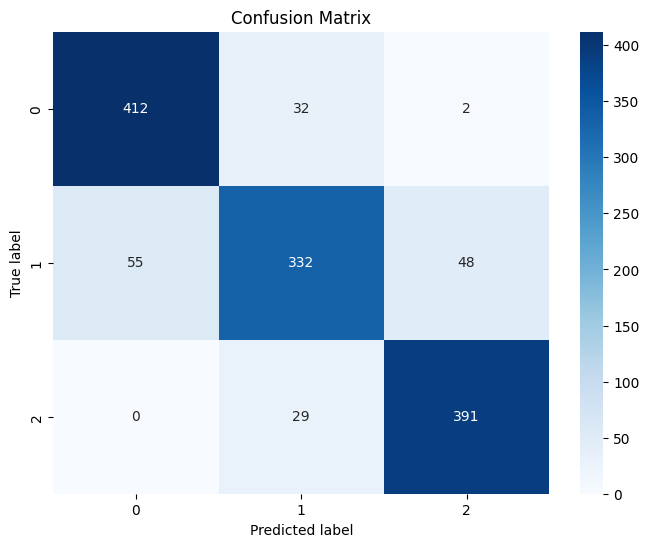

In [113]:
from sklearn.metrics import confusion_matrix

# Choosing the Random Forest model for confusion matrix example
chosen_model = models["Random Forest"]

# Making predictions on the test set
y_pred_test = chosen_model.predict(X_test)

# Dynamically get the unique labels from y_test
unique_labels = np.unique(y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=unique_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Saving Model

In [114]:
import pickle

random_forest_model = models['Random Forest']
pickle.dump(random_forest_model, open('random_forest_model.pkl', 'wb'))